# Playground text-to-face
This is the place where you can be play around with pretrained models, testing out different models and face creation.

#### Imports

In [1]:
import stylegan2
from t2f_modules.engine import generate_fakes
import clip
import math
import torch
import matplotlib.pyplot as plt

import torch.nn.functional as F

from playground_utils import *
from torchvision.transforms import ToPILImage

#### Variables for playground

In [2]:
# generator_weights = 'runs_t2f/default_test_nocliploss/generator.pt'
generator_weights = 'runs_t2f/t2f_nocosinecliploss/checkpoint_generator_epoch390.pt'

# shouldn't be changed
resolution = 64
log_resolution = int(math.log2(resolution))
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#### Create generator, CLIP and load weights

In [3]:
generator = stylegan2.Generator(log_resolution, 512).to(device)
generator.load_state_dict(torch.load(generator_weights))

clip_model, _ = clip.load("ViT-B/32", device=device)

### Text to face generation

In [35]:
# descriptions from dataset
description = 'She is wearing heavy makeup. She is smiling and has arched eyebrows, and wavy hair.'
# description = 'The person is young and has bags under eyes, beard, pointy nose, and bushy eyebrows.'
# description = 'This person has big lips, high cheekbones, wavy hair, and brown hair. She is attractive and wears earrings.'
# description = 'The woman wears heavy makeup. She has big lips, wavy hair, high cheekbones, and arched eyebrows. She is attractive.'
# description = 'This man is young and has big lips.'


# descriptions from TediGAN
# description = 'This woman has black long hair and wears earrings. She is smiling.'
# description = 'He has bread and black hair.'

# description from random / my own descriptions
# description = 'A man with a chubby face. He has black hair and is handsome.'
# description = 'Heavy makeup.'
# description = 'An undead zombie chasing a bunch of children.'

# custom
# description = 'Beard.'


torch.Size([1, 3, 64, 64])


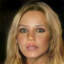

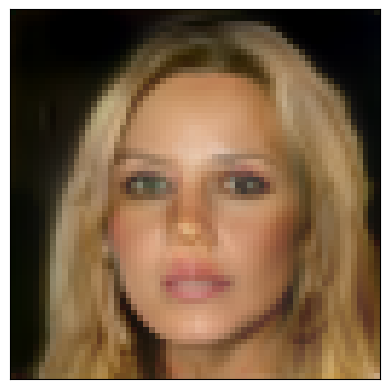

In [36]:
# Generate image from description and display
gen_img = generate_image_from_description(description, generator, clip_model, device)


print(gen_img.shape)

# clips pixels to range [0, 1]
for channel in range(gen_img.shape[1]):
    for row in range(gen_img.shape[2]):
        for col in range(gen_img.shape[3]):
            if gen_img[0, channel, row, col] > 1:
                gen_img[0, channel, row, col] = 1
            elif gen_img[0, channel, row, col] < 0:
                gen_img[0, channel, row, col] = 0

gen_img = torch.reshape(gen_img, (3, 64, 64)).detach().to('cpu')
show(gen_img)

gen_PIL = F.to_pil_image(gen_img)
# gen_PIL = ToPILImage()(gen_img)

display(gen_PIL)
plt.imshow(gen_PIL)